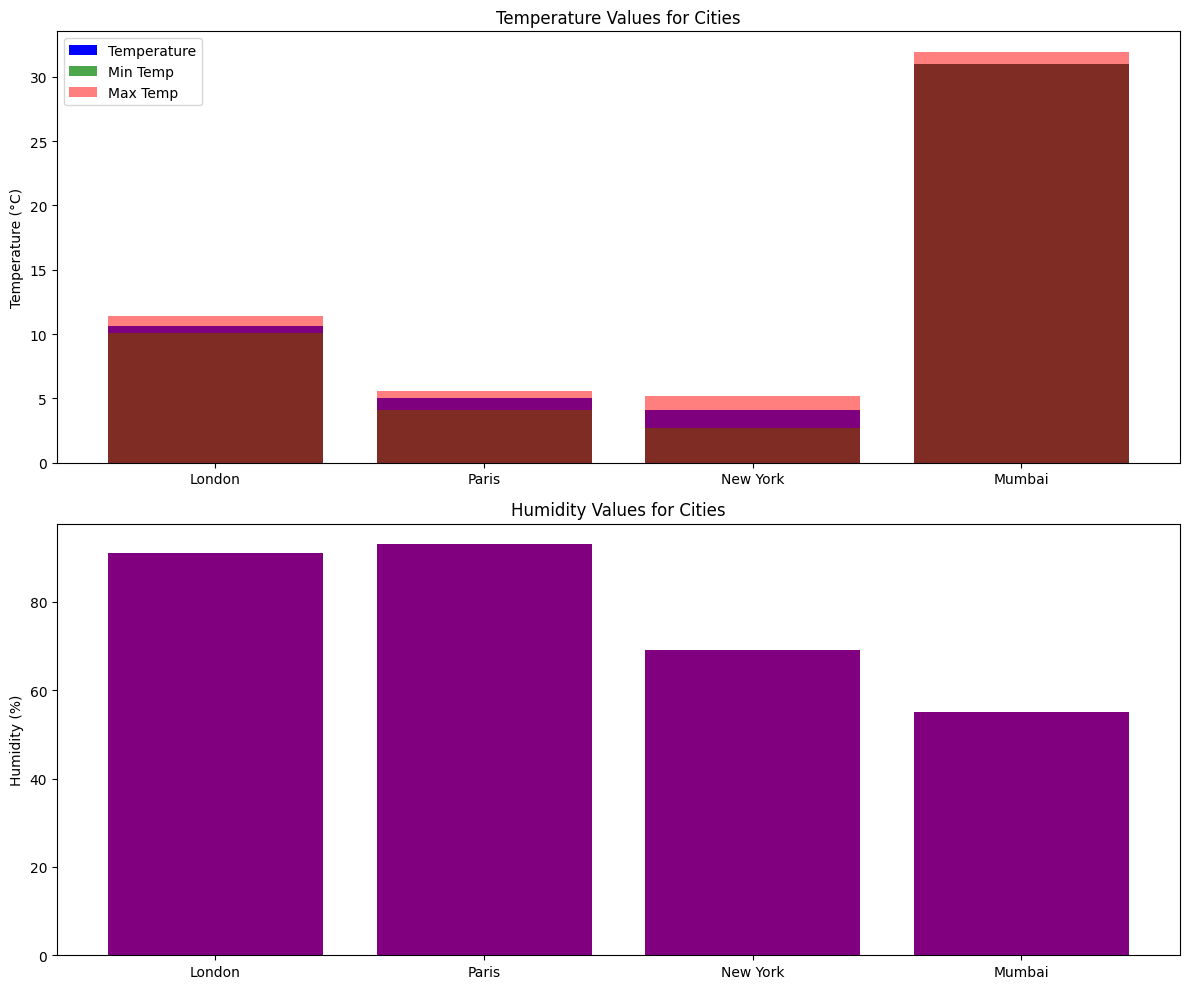

       City  Temperature (°C)  Min Temperature (°C)  Max Temperature (°C)  \
0    London             10.65                 10.06                 11.40   
1     Paris              5.00                  4.10                  5.60   
2  New York              4.10                  2.68                  5.19   
3    Mumbai             30.99                 30.99                 31.94   

   Humidity (%)  
0            91  
1            93  
2            69  
3            55  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import requests

API_KEY = 'c75117b44f72f0277e89ea15fde518a8'
cities = ['London', 'Paris', 'New York', 'Mumbai']

weather_data = {
    'City': [],
    'Temperature (°C)': [],
    'Min Temperature (°C)': [],
    'Max Temperature (°C)': [],
    'Humidity (%)': []
}

for city in cities:
    url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={API_KEY}'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        temp = data['main']['temp'] - 273.15
        temp_min = data['main']['temp_min'] - 273.15
        temp_max = data['main']['temp_max'] - 273.15
        humidity = data['main']['humidity']

        weather_data['City'].append(city)
        weather_data['Temperature (°C)'].append(temp)
        weather_data['Min Temperature (°C)'].append(temp_min)
        weather_data['Max Temperature (°C)'].append(temp_max)
        weather_data['Humidity (%)'].append(humidity)
    else:
        print(f"Failed to retrieve data for {city}. HTTP Status Code: {response.status_code}")

df = pd.DataFrame(weather_data)

fig, ax = plt.subplots(2, 1, figsize=(12, 10))

ax[0].bar(df['City'], df['Temperature (°C)'], color='blue', label='Temperature')
ax[0].bar(df['City'], df['Min Temperature (°C)'], color='green', alpha=0.7, label='Min Temp')
ax[0].bar(df['City'], df['Max Temperature (°C)'], color='red', alpha=0.5, label='Max Temp')
ax[0].set_title('Temperature Values for Cities')
ax[0].set_ylabel('Temperature (°C)')
ax[0].legend()

ax[1].bar(df['City'], df['Humidity (%)'], color='purple')
ax[1].set_title('Humidity Values for Cities')
ax[1].set_ylabel('Humidity (%)')

plt.tight_layout()
plt.show()

print(df)


In [4]:
import pyodbc
import pandas as pd

data = {
    "City": ["London", "Paris", "New York"],
    "Current_Temp": [59.0, 60.8, 62.6],
    "Min_Temp": [55.4, 57.2, 59.0],
    "Max_Temp": [62.6, 64.4, 66.2],
    "Humidity": [80, 75, 70]
}
df = pd.DataFrame(data)

conn_str = (
    r"DRIVER={ODBC Driver 17 for SQL Server};"
    r"SERVER=LAPTOP-75JKGB40;"  
    r"DATABASE=DS0;"  
    r"Trusted_Connection=yes;"
)

conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

check_table_sql = """
IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='WeatherData' AND xtype='U')
CREATE TABLE WeatherData (
    City VARCHAR(50),
    Current_Temp FLOAT,
    Min_Temp FLOAT,
    Max_Temp FLOAT,
    Humidity INT
)
"""
cursor.execute(check_table_sql)

insert_sql = """
INSERT INTO WeatherData (City, Current_Temp, Min_Temp, Max_Temp, Humidity)
VALUES (?, ?, ?, ?, ?)
"""

for _, row in df.iterrows():
    cursor.execute(insert_sql, row['City'], row['Current_Temp'], row['Min_Temp'], row['Max_Temp'], row['Humidity'])

conn.commit()
conn.close()
